<a href="https://colab.research.google.com/github/FaustinoAndres/Gases-ideales/blob/main/Tarea_2_Gas_ideal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 - Gases ideales - IPM417 - 2021/1- USM


En esta tarea, realizarán simulaciones para verificar la ley de gases ideales. Sabemos que gases ideales ocurren en 3D, sin embargo, para facilitar el código, solamente consideraremos 2D, para lo cual existen relaciones equivalentes.

Partan  de  una  caja  de  volumen $L^2=V$ con $N$ partículas  circulares  de  masa $m$ y  radio $r$ disupuestas aleatoriamente, todas con velocidad inicial $V_0$ en dirección aleatoria. Defina un paso de tiempo $\Delta t$ (ojalá menor que $r/V_0$) y deje evolucionar el sistema, chequeando la colisión (elástica) entre partículas y contra las paredes. Cuando vean que dos partículas chocan (básicamente sus radios se entrelazan), actualicen la posición de ambas separándolas, y cambien susvelocidades respecto a un choque elástico$^{1,2}$. Por si quieren inspiración, hay códigos parecidos online$^{3,4}$.

Realice simulaciones a diferentes valores de $V$,$N$ y $V_0$. A partir de sus simulaciones, realicen los siguientes cálculos:

- Verifique  que  la  distribución  de  la  velocidad  (o  cantidad  de  movimiento,  en  cualquier componente) tiende a ser de Boltzmann. ¿Cuánto tiempo demora en pasar esto? ¿Es válido para cualquier $N$?
- Calcule la presión a partir de las colisiones y transferencia de momentum sobre una pared.
- Sabiendo que para gases ideales $E = Nk_{B}T$, calcule la temperatura. Verifique la ley de gases ideales para este caso bidimensional. Junto  con  su  código,  entregue  un  informe  donde  detalle  la  metodología  que  usó,  y  sus resultados (además de todas las secciones que son relevantes en un informe).


# I. Abstract

En este trabajo realizamos un gas teórico y observamos como las propiedades macroscópicas emergen de las interacciones microscópicas. Las partículas de gas cuentan con masa y volumen e interactúan entre sí y las paredes mediante choques elásticos. Demostramos que una vez alcanzado el equilibrio, la distribución de velocidades tiende a la distribución de Maxwell-Boltzmann. Además demostramos que se cumple la ecuación de estado para un gas ideal. Demostramos que las fluctuaciones decrecen a medida que aumenta el número de partículas.

# II. Introducción

El gas ideal es un gas teórico compuesto por partículas puntuales, las cuales no interactúan entre ellas. Es un modelo extremadamente simple y nos entrega una ecuación de estado que relaciona las variables de presión $P$, el volumen $V$ y la temperatura $T$. La importancia de este modelo es que en condiciones normales de presión y temperatura, la mayoría de los gases reales (nitrógeno, hidrógeno, oxígeno, etc.) se comportan como gases ideales (cualitativamente), otros gases más pesados se pueden tratar como gas ideal con un error asociado, razonable. Modificando algunas de sus variables termodinámicas podremos acercarnos a un comportamiento ideal, estas variables son: La temperatura y la densidad. Recordemos que la energía de las partículas en gases ideales es solamente energía cinética (no cuentan con energía potencial debido a que no hay interacción entre ellas), esto quiere decir que si la temperatura sube, las partículas incrementan su energía cinética, por parte de la densidad, si disminuye el gas se hace menos denso, las partículas están más separadas unas de otras y con ello disminuye las fuerzas intermoleculares. En este trabajo haremos uso de computación científica para emular un gas teórico, pero más realista que el gas ideal, esto quiere decir, las partículas tendrán volumen (no serán partículas puntuales) y las partículas interactuarán entre ellas. Los objetivos de este trabajo son:

- Verificar la distribución de velocidades de las partículas y que tiende a la distribución de Boltzmann.
- Determinar la presión ejercida las partículas sobre el estanque.
- Determinar la temperatura y energía de las partículas.
- Verificar la ley de gases ideales.

# III. Metodología

A. Descripción de un gas ideal

En está sección, se describe el gas teórico utilizado y las ecuaciones que gobiernan. La simulación consiste en un estanque cerrado y adiabático, el cual contiene $N$ partículas con comportamiento clásico con posiciones $\vec{x}_{i}$ y velocidades $\vec{v}_{i}$. Las partículas tienen un radio $r_{i}$. La caja tiene un largo y alto de $L$, es decir, las partículas se pueden mover sobre el dominio $[0, L] \times [0, L]$. Las partículas no ejercen fuerzas de interacción moleculares entre ellas, por lo que la energía potencial del sistema es cero, pero si interactúan por choques elásticos, esto quiere decir que sufren una fuerza instantánea que cambia sus velocidades, un cambio en su cantidad de movimiento $\vec{p}_{i}$. Dado que las interacciones son elásticas, por lo cual se la energía del sistema se conserva (ecuación (1)).

$E = \sum_{i} \frac{1}{2}m_{i} v_{i}^{2}$ (1)

las paredes del estanque, se mueven con una velocidad constante. La trayectoria que describe este movimiento es dada por la ecuación (2):

$\vec{x}_{i}(t+\Delta t) = \vec{x}_{i}(t) + \vec{v}_{i} \Delta t$ (2)

![](move.png)

Cuando una partícula se encuentre con las paredes del estanque, esta se reflejará siguendo la ecuación (3), donde $\hat{n}$ es el vector normal de la superficie, $w$ es la posición de la pared. Solo se considera reflexión especular.

$\vec{x}_{i} - r_{i} \hat{n} = w$ (3)

Debido a esta reflexión con choque elástico, la componente de la velocidad normal a la superficie cambia de dirección, es decir, invertida (ecuación (4)).

$\vec{v}_{i}^{*} = \vec{v}_{i} - 2(\vec{v}_{i} \cdot \hat{n})\hat{n}$ (4)

![](reflect_wall.png)

Cuando dos partículas colisionan, ambas cambian de dirección según la ecuación (5) debido a la conservación de cantidad de movimiento.

$\vec{v}_{i}^{*} = \vec{v}_{i} - \frac{2 m_{j}}{m_{i}+m_{j}} \frac{(v_{i}-v_{j})\cdot(x_{i}-x_{j})}{||x_{i}-x_{j}||^{2}}  (x_{i}-x_{j})$ (5)

$\vec{v}_{j}^{*} = \vec{v}_{j} - \frac{2 m_{i}}{m_{i}+m_{j}} \frac{(v_{j}-v_{i})\cdot(x_{j}-x_{i})}{||x_{j}-x_{i}||^{2}}  (x_{j}-x_{i})$

La colisión de ambas partículas se lleva a cabo cuando sus centros están a una distancia de $|r_{i}+r_{j}|$. En nuestro caso las partículas son de la misma especie, por tanto el contacto se lleva a cabo en $2|r|$.

![](2_particles.png)

Con estás ecuaciones de movimiento, se deja evolucionar el sistema un tiempo $T$. A partir de las interacciones de las partículas entre ellas y las paredes se extraen las propiedades macroscópicas del sistema.


B. Implementación

En esta sección se describe como es resuelto el problema.

El problema será resuelto mediante simulación computacional con el lenguaje de programación [python 3](https://www.python.org/) en un ambiente de [jupyter notebook](https://jupyter.org/) alojado en [deepnote](https://deepnote.com/).

En primer lugar importaremos las librerías y paquetes necesarios para trabajar con computación científica: [numpy](https://numpy.org/) y [matplotlib](https://matplotlib.org/). Además definiremos la [constante de Boltzmann](https://es.wikipedia.org/wiki/Constante_de_Boltzmann) $k_{B}=1.380648\times 10^{-23} \: J/K$ como una constante en nuestro notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
k_B = 1.380648e-23


Utilizaremos el concepto de programación orientada a objetos para crear las partículas que necesitemos, las cuales tendrán los mismos atributos. Utilizaremos la clase llamada `Particle` con la que crearemos una partícula de masa `m` y radio `r`. Los métodos de la clase `Particle` son los siguientes:

- `__init__(self, m=0.01, r=0.1)`: Es el contructor de la clase. sus parámetros de entrada son la masa `m` de la partícula, que tiene el valor por defecto de $0.01 kg$ y el radio `r`, cuyo valor por defecto es de $0.1 m$. Además dentro de este método se inicializa el vector de posiciones `x` y el vector de velocidades `v`. Otros parámetros almacenados son el largo `L` de la caja contenedora inicializado con el valor de `None` y `boundary` que es una lista vacía para almacenar los límites de la caja.

- `initial_conditions(self, v, theta, L)`: Este método inicializa a nuestra partícula, le das las condiciones iniciales del problema. Los parámetros de entrada de este método son `v` como la magnitud de la velocidad de la partícula, `theta` como el ángulo formado entre la horizontal y el vector velocidad asociado a la partícula y el largo de la caja `L`. El detalle del su implementación se presenta a continuación.
    1. Asignar el valor de `L` a `self.L`.
    2. Asignar una posición inicial dentro de la caja simulada, la tiene un dominio $[0,L] \times [0, L]$. La posición es asignada de manera aleatoria siguiendo una distribución uniforme en el intervalo $[2r,L-2r] \times [2r, L-2r]$, restringimos un poco el dominio para no oresentar el problema de superposición de posiciones de la partícula y las paredes.
    3. Descomponer la velocidad en el eje x $v_{x} = v \cdot cos(\theta)$ y la velocidad en el eje y $v_{y} = v \cdot sin(\theta)$.
    4. Asignar valores a `boundary`. `boundary=[0, self.L, 0, self.L]`.
    
- `move(self, dt)`: se refiere a actualizar la posición de la partícula después de un paso de tiempo `dt` según $\vec{x}_{f} = \vec{x}_{i} + \Delta t  \cdot \vec{v}$.

- `wall_interaction(self, dt)`: Una vez aplicada el método `move`, la partícula puede intersectar con las paredes del estanque, para ello se implementa este métod.Su función es restituir la posición de la partícula, es decir, si se detecta que una partícula está en contancto con la pared, se determina el tiempo exacto en la cual ambos están entran en contacto (cuando se cumple que la distancia entre el centro de la partícula y alguna de las paredes sea igual al radio) y se lleva a cabo el choque elástico, es decir, sin pérdidas de energía y solo transferencia de momento. La partícula rebota en la pared y se mueve el tiempo de superposición en la dirección del rebote. Para ello, se implementan un método por cada pared: izquierda, derecha, arriba y abajo:

    - `wall_interaction_left(self, dt)`
    - `wall_interaction_right(self, dt)`
    - `wall_interaction_top(self, dt)`
    - `wall_interaction_bottom(self, dt)`


Una partícula que está en un tiempo $t$ cerca de la pared, y que en el paso siguiente de tiempo, es decir, $t + \Delta t$ se encuentra superpuesta con esta. Esta situación es lo que intenta resolver `wall_interaction`.


![Superposición](/content/drive/MyDrive/superposicion.png)
![](https://drive.google.com/file/d/12XjlVT2ho3cgWUCqgMVqUTizrsgYnr7G/view?usp=sharing)

In [ ]:
class Particle():

    def __init__(self, m=0.1, r=0.1):
        self.m = m
        self.r = r
        self.x = np.zeros(2)
        self.v = np.zeros(2)
        self.L = None
        self.boundary = list()
        self.Delta_P = 0

    def initial_conditions(self, v, theta, L):
        
        self.L = L
        #posiciones iniciales aleatorias dentro del dominio [0,L] X [0, L]
        self.x[0] = np.random.uniform(2*self.r, self.L-2*self.r)
        self.x[1] = np.random.uniform(2*self.r, self.L-2*self.r)
        
        #velocidades iniciales de magnitud v
        self.v[0] = v*np.sin(theta)
        self.v[1] = v*np.cos(theta)

        self.boundary = [0, self.L, self.L, 0]

    def move(self, dt):
        self.x = self.x + dt*self.v

    def wall_interaction(self, dt):
        self.Delta_P = 0
        self.wall_interaction_left(dt)
        self.wall_interaction_right(dt)
        self.wall_interaction_top(dt)
        self.wall_interaction_bottom(dt)

    def wall_interaction_left(self, dt):
        delta_x = self.x[0] - self.boundary[0]
        if (0 <= delta_x < self.r) and (self.v[0] < 0):
            x_superpuesto = self.r - delta_x
            delta_t_int = x_superpuesto/np.absolute(self.v[0])
            Delta_t_fis = dt - delta_t_int
            self.x[0] = self.boundary[0] + self.r + np.absolute(self.v[0])*Delta_t_fis
            self.v[0] = -self.v[0]
            self.Delta_P = 2*self.m*np.absolute(self.v[0])
            
    def wall_interaction_right(self, dt):
        delta_x = self.boundary[2] - self.x[0] 
        if (0 <= delta_x < self.r) and (self.v[0] > 0):
            x_superpuesto = self.r - delta_x
            delta_t_int = x_superpuesto/np.absolute(self.v[0])
            Delta_t_fis = dt - delta_t_int
            self.x[0] = self.boundary[2] - (self.r + np.absolute(self.v[0])*Delta_t_fis)
            self.v[0] = -self.v[0]
            self.Delta_P = 2*self.m*np.absolute(self.v[0])

    def wall_interaction_top(self, dt):
        delta_y = self.boundary[1] - self.x[1]
        if (0 <= delta_y < self.r) and (self.v[1] > 0):
            y_superpuesto = self.r - delta_y
            delta_t_int = y_superpuesto/np.absolute(self.v[1])
            Delta_t_fis = dt - delta_t_int
            self.x[1] = self.boundary[1] - (self.r + np.absolute(self.v[1])*Delta_t_fis)
            self.v[1] = -self.v[1]
            self.Delta_P = 2*self.m*np.absolute(self.v[1])

    def wall_interaction_bottom(self, dt):
        delta_y = self.x[1] - self.boundary[3]
        if (0 <= delta_y < self.r) and (self.v[1] < 0):
            y_superpuesto = self.r - delta_y
            delta_t_int = y_superpuesto/np.absolute(self.v[1])
            Delta_t_fis = dt - delta_t_int
            self.x[1] = self.boundary[3] + (self.r + np.absolute(self.v[1])*Delta_t_fis)
            self.v[1] = -self.v[1]
            self.Delta_P = 2*self.m*np.absolute(self.v[1])


In [ ]:
def distance(a, b):
    dist = np.linalg.norm(a-b)
    return dist

Para simular el estanque con particulas, lo haremos con la clase `Domain`. Con esta clase podremos definir el tamaño del estanque `V`, el número de partículas `N`, la velocidad inicial `v`. Los métodos que cuenta `Domain` son:

- `__init__(self, N=10, V=100, v=1, n_grid=4, r=0.1)`: Contructor de la clase, admite como parámetros de entrada, la cantidad de partículas `N`, el volumen del estanque `V`, la cantidad de subdivisiones `n_grid`, el radio de las partículas `r`. Se crea una lista que contiene $N$ partículas, donde cada elemento de la lista es una instancia de la clase `Particle`. Otros parámetros definidos internamente, es el largo `L` de la caja definido como $L = \sqrt{V}$, grid, que es una lista de listas de tamaño $n_{grid} \times n_{grid}$, para crear una malla para clasificar las partículas y reducir los tiempos de cálculo.

- `set_IC(self)`: Método encargado de configurar las condiciones iniciales del estanque. Entregamos a cada partícula las condiciones iniciales usando el método `Particle.initial_conditions`. Posteriormente usamos `Domain.clustering` para agrupar las partículas en su respectivo sub conjunto de la malla. Si las particulas están sobrepuestas, se corrige con el método `Domain.particles_collisions(IC=True)`.

- `dynamic(self, dt=0.01)`: Genera el movimiento de todas las partículas, corrobora si están superpuestas o si están en contacto con las paredes y realiza las correcciones de posición y velocidad.

- `plot_particles(self)`: Grafica el estanque con todas las partículas en un instante dado.

- `clustering(self)`: Agrupa las partículas en cada cuadrante de la malla `grid`. La idea es para reducir las interacción $N$ a $N$ ded las partículas, y solo se corrobora si hay contacto entre partículas de un mismo cuadrante.

- `particles_collisions(self, IC=False)`: Recorre cada una de las cuadrículas y determina la interacción de las partículas dentro de una misma cuadrícula.

- `interaction_between_particules(self, particles, IC)`: 

- `collision(self, particle_1, particle_2, dt_colission, dist_c)`:

- `previus_step(self, particle_1, particle_2, dt=0.01)`: Reestablece el paso previo a una colisión para ser usado con el método de bisección.

- `biseccion_time(self, particle_1, particle_2, dist_prev, dist, dt=0.01)`: Método iterativo, para determinar el punto exacto en el tiempo donde se produce la colisión.

- `fixing_IC(self, particle_1, particle_2, dist, dt=0.01)`: 
- `density_maxwell(self)`: Grafíca la distribución de maxwell Boltzmann para un instnate dado

In [ ]:
class Domain():

    def __init__(self, N=10, V=100, v=1, n_grid=4, r=0.1, m=0.1):
        self.N = N
        self.V = V
        self.r = r
        self.m = m
        self.v = v
        self.L = np.sqrt(V)
        self.n_grid = n_grid
        self.particles = [Particle(self.m, self.r) for _ in range(self.N)]
        self.grid = [[[] for _ in range(self.n_grid)] for _ in range(self.n_grid)]
        self.density = {}
        self.position = []
        self.velocities = []
        self.P = 0
        self.P_list = []
        self.T = 0
        self.E = 0


    def set_IC(self):

        self.E = 0
        for particle in self.particles:
            theta = np.random.uniform(0, 2*np.pi)
            particle.initial_conditions(self.v, theta, self.L)
            self.E += particle.m*np.linalg.norm(particle.v)**2
        self.E = 0.5*self.E
        self.T = self.E / (self.N*k_B)
        self.clustering()
        self.particles_collisions(IC=True)
        print(self.E)
        print(self.T)


    def dynamic(self, dt=0.01):

        self.P = 0
        for particle in self.particles:
            particle.move(dt)
            particle.wall_interaction(dt)
            self.P += particle.Delta_P

        self.P = self.P / (4*dt*self.L)
        self.P_list.append(self.P)
        self.particles_collisions(IC=False)

    def save(self):

        self.position.append([particle.x for particle in self.particles])
        self.velocities.append([particle.v for particle in self.particles])

    def plot_particles(self):

        box = np.linspace(start=0, stop=self.L, num=10, endpoint=True)
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        plt.fill_between(x=box, y1=self.L, y2=0, where=[True]*len(box), color='#CFFCD8',  alpha=.25)
        for particle in self.particles:
            plt.scatter(particle.x[0], particle.x[1], s=10, c='#483D8B', alpha=0.9)
        plt.xlim([-1, self.L+1])
        plt.ylim([-1, self.L+1])
        ax.set_aspect('equal', adjustable='box')

    def clustering(self):
        
        self.grid = [[[] for _ in range(self.n_grid)] for _ in range(self.n_grid)]

        for particle in self.particles:
            pos_x = int((self.n_grid)*(particle.x[0]/self.L))
            pos_y = int((self.n_grid)*(particle.x[1]/self.L))
            
            self.grid[pos_y][pos_x].append(particle)
        
    def particles_collisions(self, IC=False):

        for i in range(self.n_grid):
            for j in range(self.n_grid):
                particles = self.grid[i][j]
                self.interaction_between_particules(particles, IC)

    def interaction_between_particules(self, particles, IC):
        for i in range(len(particles)):
            for j in range(i+1, len(particles)):
                dist = distance(particles[i].x, particles[j].x)
                if dist <= 2*self.r:
                    if IC == False:
                        #print(particles[i].v, particles[j].v)
                        dist_prev = self.previus_step(particles[i], particles[j])
                        dist_c, dt_colission = self.biseccion_time(particles[i],particles[j],dist_prev,dist,dt=0.01)
                        self.collision(particles[i],particles[j],dt_colission, dist_c)
                        #print(particles[i].v, particles[j].v)
                    else:
                        self.fixing_IC(particles[i], particles[j], dist)
    
    def collision(self, particle_1, particle_2, dt_colission, dist_c):
        particle_1.x = particle_1.x - dt_colission*particle_1.v
        particle_2.x = particle_2.x - dt_colission*particle_2.v

        v_aux = particle_1.v - particle_2.v
        x_aux = particle_1.x - particle_2.x

        particle_1.v -= np.dot(v_aux, x_aux)/(dist_c)**2 * x_aux
        particle_2.v += np.dot(-v_aux, -x_aux)/(dist_c)**2 * x_aux

    def previus_step(self, particle_1, particle_2, dt=0.01):
        x_1_prev = particle_1.x - dt*particle_1.v
        x_2_prev = particle_2.x - dt*particle_2.v
        dist_prev = distance(x_1_prev, x_2_prev)
        return dist_prev

    def biseccion_time(self, particle_1, particle_2, dist_prev, dist, dt=0.01):

        tol = 0.000001
        t_a, t_b = 0.0, dt
        f_a, f_b = dist_prev - 2*self.r, dist - 2*self.r
        count = 0
        while(True):
            count += 1
            t_c = 0.5*(t_b+t_a)
            f_c = self.previus_step(particle_1=particle_1,particle_2=particle_2, dt=(dt - t_c)) - 2*self.r
            if f_a*f_c < 0:
                t_b = t_c
                f_b = f_c
            else:
                t_a = t_c
                f_a = f_c

            if np.absolute(f_c)<tol or count == 500:
                break
        
        t_c = 0.5*(t_b+t_a)
        dist_c = self.previus_step(particle_1=particle_1,particle_2=particle_2, dt=(dt - t_c))
        dt_colission = dt - t_c
        return dist_c, dt_colission

    def fixing_IC(self, particle_1, particle_2, dist, dt=0.01):
        x_2_prev = particle_2.x + 2*self.r*(particle_2.x - particle_1.x)/dist
        #dist_prev = distance(particle_1.x, x_2_prev)
        particle_2.x = x_2_prev

    def density_maxwell(self):

        speed = np.linspace(start=0, stop=5, num=51, endpoint=True)
        #f = 4*np.pi*speed**2*np.exp(-self.m*speed**2/(2*k_B*self.T))*np.power(m/(2*np.pi*k_B*self.T),1.5)
        f = speed*np.exp(-self.m*speed**2/(2*k_B*self.T))*np.power((m/(k_B*self.T)), 1)
        velocities = []
        for particle in self.particles:
          velocities.append(np.linalg.norm(particle.v))

        plt.hist(velocities, bins='auto', color='#FCC7B5', rwidth=0.85, density=True, stacked=True)
        plt.plot(speed, f)
        plt.grid(axis='y', alpha=0.75)
        plt.xlabel('velocidad')
        plt.ylabel('densidad')
        plt.xlim([0, 5.])
        plt.show()


25.00000000000022
3.621487881052987e+21


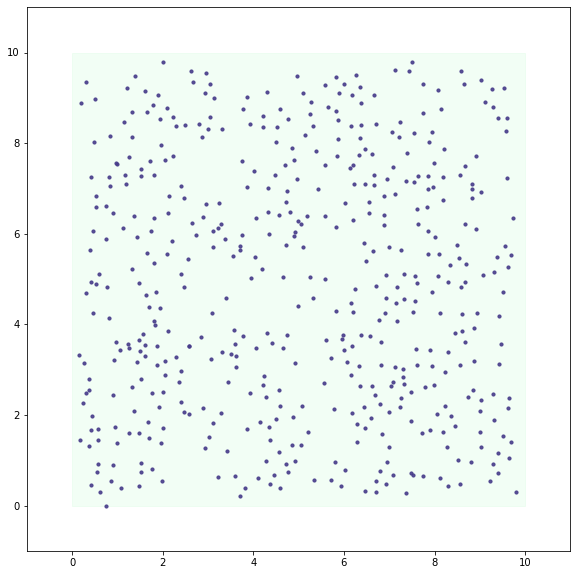

In [ ]:
domain = Domain(N=500)
domain.set_IC()
domain.plot_particles()

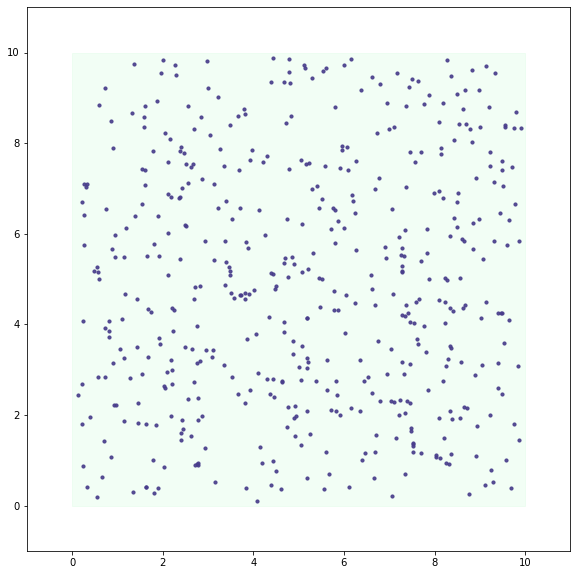

In [ ]:
for i in range(501):
  if i%5 == 0:
    domain.clustering()
  domain.dynamic()
  domain.save()
domain.plot_particles()

# IV. Análisis y Resultados

El análisis principal se va a llevar a cabo con una caja con 500 partículas con $V=100$. Nuestra primera tarea, será calcular la energía y la temperatura del sistema.

La energía se calcula según la ecuación (1), que solo depende de las masas de las partículas y la velocidad inicial ($v=1 m/s$), lo cual nos entrega una energía de $25.00000000000022 J$, que corresponde a $25 J$ teóricos, la diferencia se debe a errores de punto flotante. Con la energía del sistema se puede calcular la temperatura del estanque según:

$T = \frac{E}{N k_{B}} (8)$

Esta ecuación es válida para un estanque 2D. La temperatura de la caja es $3.21487881052987\times 10^{21} K$, pero nos coviene tratar con la cantidad $k_{B}T = 0.05 J$, por simplicidad.

La presión sufre de mucho ruido, pues depende de las partículas que logren interactuar con la pared en un tiempo $\Delta t$. Recordemos que la presión se puede definir como fuerza por unidad de área:

$P = \frac{F}{A}$ (6)

Como la fuerza corresponde a la variación de momento $\Delta p$, basta con capturar la interacción de las partículas con la pared cada $\Delta t$.

$P = \frac{\sum_{j}\Delta p_{j}}{4L\Delta t}$ (7)

El área para un estanque en 2D, corresponde a $4L$.

El gráfico que viene a continuación, se muestra que la presión varía, hay intervalos de tiempo que la presión es "cero", esto debido a que no hay moléculas interactuando con la pared, por el contrario, hay intervalos que la presión se eleva y alcanza los 2 Pa.

La presión del estanque según la ecuación (7), nos da como resultado $P=0.25795614535846356 \: Pa$. Notemos que teóricamente segun la ecuación:

$P = \frac{Nk_{B}T}{V} (9)$

La presión debe ser 0.25 Pa.

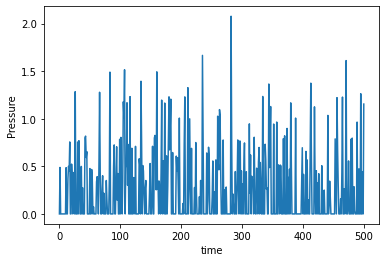

0.25795614535846356


In [ ]:
dt = 0.01

fig, ax = plt.subplots()
ax.plot(domain.P_list)
ax.set_xlabel('time')
ax.set_ylabel('Pressure')
plt.show()

print(sum(domain.P_list[250:])/len(domain.P_list[250:]))

Las partículas dentro del estanque, están en contacto unas con otras e interactuando con las paredes, esta física debería ser muy parecida al random walk viste en tareas previas. 

Para ver el comportamiento de una partícula graficaremos su trayectoria.

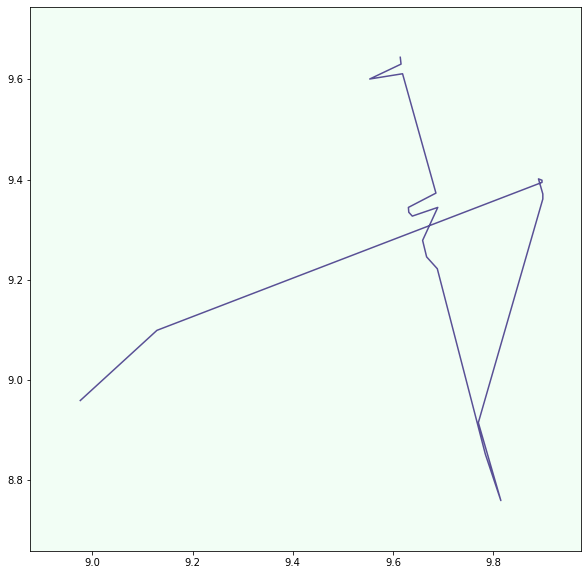

In [ ]:
x = list()
y = list()
for position in domain.position:
  x.append(position[0][0])
  y.append(position[0][1])


box = np.linspace(start=0, stop=domain.L, num=10, endpoint=True)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.fill_between(x=box, y1=domain.L, y2=0, where=[True]*len(box), color='#CFFCD8',  alpha=.25)
plt.plot(x, y, c='#483D8B', alpha=0.9)
plt.xlim([x[0]-0.1, x[0]+1])
plt.ylim([y[0]-0.3, y[0]+np.abs(y[0]-y[-1])+0.1])
ax.set_aspect('equal', adjustable='box')


Podemos notar como la partícula, sufre varios cambios de trayectoria durante la simulación.

Si asumimos que en general, la partícula se comporta como random walk, podríamos calcular su desplazamiento cuadrático medio $|\vec{X}(t)-\vec{X}(0)|^{2}$. En la siguiente gráfica se muestra el desplazamiento cuadrático medio de 5 partículas. 

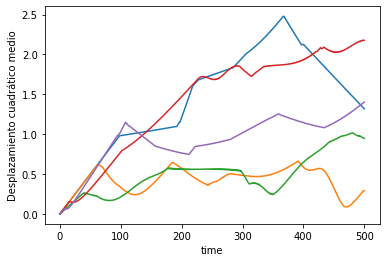

In [ ]:
dcm1, dcm2, dcm3, dcm4, dcm5 = [], [], [], [], []

for position in domain.position:
    dcm1.append(np.linalg.norm(position[12] - domain.position[0][12]))
    dcm2.append(np.linalg.norm(position[1] - domain.position[0][1]))
    dcm3.append(np.linalg.norm(position[2] - domain.position[0][2]))
    dcm4.append(np.linalg.norm(position[3] - domain.position[0][3]))
    dcm5.append(np.linalg.norm(position[4] - domain.position[0][4]))

fig, ax = plt.subplots()
ax.plot(dcm1)
ax.plot(dcm2)
ax.plot(dcm3)
ax.plot(dcm4)
ax.plot(dcm5)
ax.set_xlabel('time')
ax.set_ylabel('Desplazamiento cuadrático medio')
plt.show()

Una cualidad importante que tienen los gases ideales, es que la velicidad de sus partículas cumplen con la distribución de Maxwell-Boltzmann, que para el caso de un gas en 2D, tiene la fórmula:

$f(v) = v \left( \frac{m}{k_{B}T}\right)exp\left( - \frac{m}{2k_{B}T} v^{2}\right)$

Posterior al tiempo de simulación, se agrupa las velocidades de todas las partículas, y se grafíca en un histograma.

En la siguiente imágen se muestra como se cumple la distribución de Maxwell-Boltzmann después que el sistema alcanza el equilibrio.

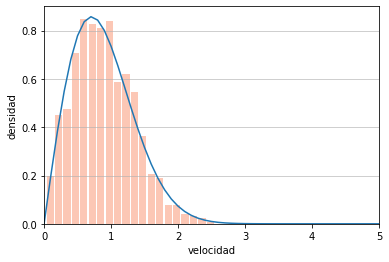

In [ ]:
domain.density_maxwell()

Para comprobar la leyes de los gases ideales se debe variar algún parámetro para obtener un estado diferente, para ellos modificaremos el número de partículas, y calcularemos la presión promedio en cada simulación.

In [ ]:
_N = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
P_N = []
for N in _N:
  DN = Domain(N=N)
  DN.set_IC()
  for i in range(101):
    if i%5 == 0:
      DN.clustering()
    DN.dynamic()
    DN.save()
  P_N.append(sum(DN.P_list[50:])/len(DN.P_list[50:]))
print(P_N)

4.99999999999999
3.6214878810529485e+21
10.000000000000007
3.621487881052958e+21
15.000000000000078
3.621487881052974e+21
20.00000000000015
3.6214878810529826e+21
25.00000000000022
3.621487881052987e+21
30.00000000000029
3.6214878810529905e+21
35.00000000000015
3.6214878810529705e+21
39.999999999999865
3.6214878810529433e+21
44.99999999999958
3.6214878810529213e+21
49.9999999999993
3.621487881052904e+21
[0.06856895794082486, 0.0811182793359914, 0.20278455305903173, 0.2967048180846344, 0.37214964997448674, 0.3920253664600644, 0.4428684433887788, 0.5751311956420412, 0.6639111051539368, 0.741305549573357]


El gráfico muestra como varía la presión al aumentar el número de partículas, la línea roja corresponde a la línea teórica. La presión aumenta a medida que aumenta el número de partículas, esto se explica con el mayor choque de partícula simultaneamente con las paredes.

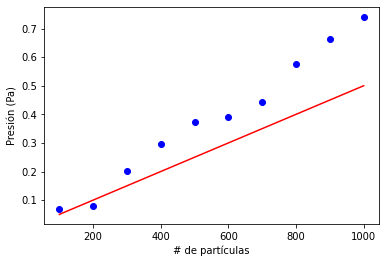

In [ ]:
p_teorico = [0.0005*N for N in _N]
fig, ax = plt.subplots()
ax.scatter(_N, P_N, color='blue')
ax.plot(_N, p_teorico, color='red')
ax.set_xlabel('# de partículas')
ax.set_ylabel('Presión (Pa)')
plt.show()

Otra forma de medir las fluctuaciones, es contando las partículas que hay en alguna mitad de la caja, para este ejemplo contaremos las partículas del lado derecho para cada paso de tiempo (con respecto a la simulación principal).

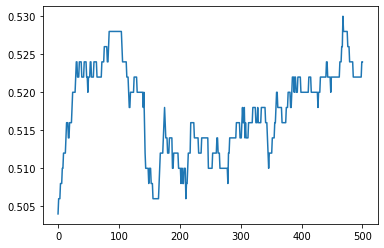

In [ ]:
right_side = []

for position in domain.position:
  count = 0
  for particle in position:
    count += (particle[0]>=0.5*domain.L)
  right_side.append(count/500)

plt.plot(right_side)
plt.xlabel('time')
plt.ylabel('% partículas')
plt.show()

# V. Conclusiones

Se realizó una simulación de partículas interactuando mediante choques elásticos en un estanque de 2 dimensiones, con estás condiciones se recrea el comportamiento de un gas ideal.
Se calculó la energía y temperatura del sistema a partir de su energía cinética, cálculo muy importante porque relaciona fenómenos microscópico (velocidad inidivudual de cada partícula) con fenómeno macroscópico (temperatura del sistema completo).
Además, se determinó la presión interna que ejercen las partículas sobre las paredes, que en el caso de nuestra simulación principal tuvo una diferencia de 0.079 Pa. Está presión fue calculada como un promedio temporal, debido a que la cantidad de partículas en el estanque N=500 no son suficientes para determinar una cantidad isotrópica. Esto quiere decir, que al calcular la presión sufre de muchas variaciones, la presión en un instante es nula, y al posterior puede alcanzar un máximo de 2 Pa.

Además se muestra que después de un tiempo, cuando alcanza el equilibrio, la distribución de la velocidad de las partículas se comporta como una distribución de Maxwell-Boltzmann.

Se estudió además el comportamiento de partículas individuales para mostrar su trayectoria y como esta es afectada por los choques con otras partículas, además calculamos el desplazamiento cuadrático medio.

En una simulación posterior, mostramos que variando el número de partículas desde 100 a 1000, la presión aumenta, pero se desfasa con respecto a la curva teórica. Para evitar este tipo de desviación, es recomendable aumentar el número de partículas para mejorar la estadística.

Pudimos notar que a partir de un sistema microscópico se puede obtener resultados medibles a macro escala, en este caso particular la presión $P$, la temperatura $T$.

Como conclusión final, se muestra que un modelo de choque elático (conservando la energía), obtiene resultados cercanos a lo que es un modelo teórico como lo es el modelo de gas ideal. Para un gas ideal, el número de partículas es del orden del número de avogadro y además no interactúan entre sí, en este caso se obtubieron estos resultados a partir de una simulación de 100-1000 partículas, la diferencias entre ambos sistemas es de $10^{20}-10^{21}$ partículas.



# VI. Referencia

$^{1}$https://seanny1986.wordpress.com/2017/10/01/simulation-of-elastic-collisions-in-python/2

$^{2}$https://en.wikipedia.org/wiki/Elastic\_collision\#Two-dimensional3

$^{3}$https://github.com/jlian/2d-gas-simulator4

$^{4}$https://github.com/labay11/ideal-gas-simulation

$^{5}$https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Maxwell-Boltzmann